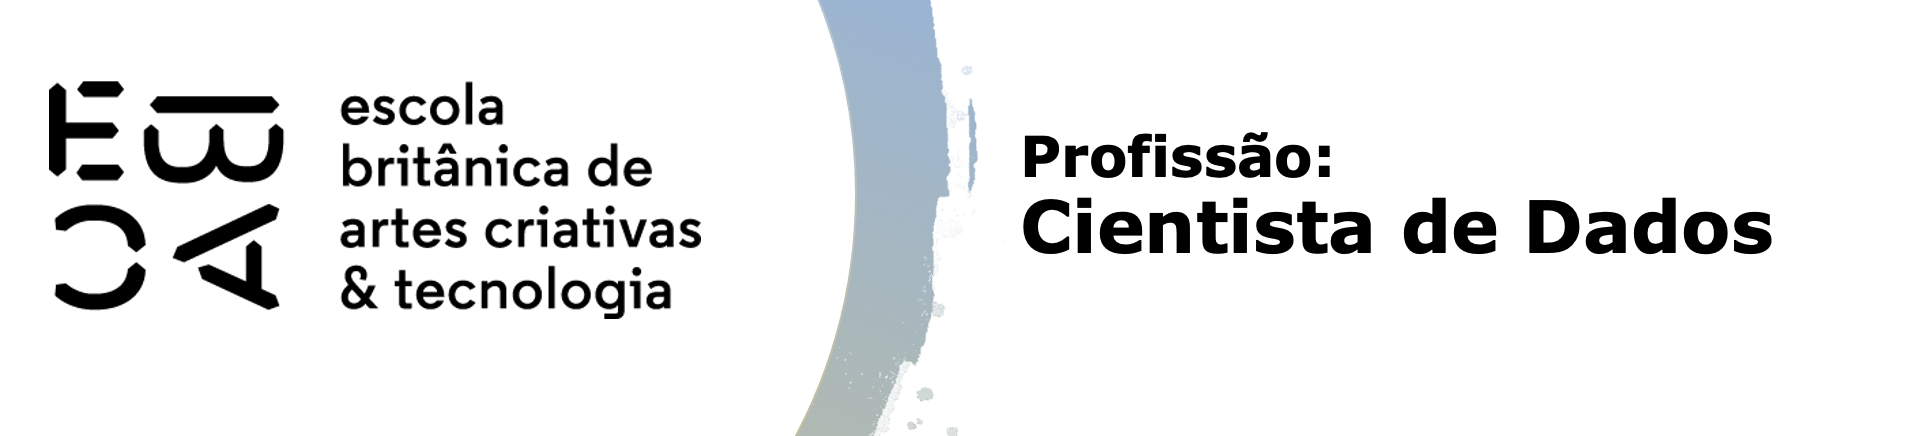

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [16]:
# Caminho para feture.txt
features_path  = "~/Desktop/UCI HAR Dataset/features.txt"

# Carregar os nomes das fetures
features = pd.read_csv(features_path, sep="\s+", header=None, usecols=[1], names=["feature_name"])
feature_names = features["feature_name"]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_8325/2074543054.py:5: SyntaxWarning: invalid escape sequence '\s'
  features = pd.read_csv(features_path, sep="\s+", header=None, usecols=[1], names=["feature_name"])


In [17]:
# Caminho para subject_train.txt
subject_train_path = "~/Desktop/UCI HAR Dataset/train/subject_train.txt"

# Carregar os dados de indivíduos
subject_train = pd.read_csv(subject_train_path, sep="\s+", header=None, names=['subject'])

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_8325/2498940378.py:5: SyntaxWarning: invalid escape sequence '\s'
  subject_train = pd.read_csv(subject_train_path, sep="\s+", header=None, names=['subject'])


In [18]:
# Caminho para X_train.txt
X_train_path = "~/Desktop/UCI HAR Dataset/train/X_train.txt"

# Carregar os dados da base X_train
X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)

# Renomeiar as colunas de X_train
X_train.columns = feature_names

# Adicionar coluna 'subject' ao DataFrame
X_train['subject'] = subject_train['subject']

# Criar um índice duplo com a ordem dos dados e o identificador do indivíduo
X_train.index = pd.MultiIndex.from_arrays([X_train.index, X_train['subject']], names=["order", "subject"])

/tmp/ipykernel_8325/1510964614.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)


In [19]:
# Caminho para subject_text.txt
subject_test_path = "~/Desktop/UCI HAR Dataset/test/subject_test.txt"

# Caminho para X_test.txt
X_test_path = "~/Desktop/UCI HAR Dataset/test/X_test.txt"

# Carregar subject_test
subject_test = pd.read_csv(subject_test_path, sep="\s+", header=None, names=['subject'])

# Carregar X_test
X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)

# Renomear as colunas de X_test
X_test.columns = feature_names

# Adicionar coluna 'subject'
X_test['subject'] = subject_test['subject']

# Criar um indice duplo
X_test.index = pd.MultiIndex.from_arrays([X_test.index, X_test['subject']], names=["order", "subject"])

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_8325/3633044864.py:8: SyntaxWarning: invalid escape sequence '\s'
  subject_test = pd.read_csv(subject_test_path, sep="\s+", header=None, names=['subject'])
/tmp/ipykernel_8325/3633044864.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)


In [20]:
# Seleção das variáveis de interesse
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [21]:
X_train_selected.to_csv("~/Desktop/UCI HAR Dataset/train/X_train_selected.csv")
X_test_selected.to_csv("~/Desktop/UCI HAR Dataset/test/X_test_selected.csv")
subject_train.to_csv("~/Desktop/UCI HAR Dataset/train/subject_train.csv")
subject_test.to_csv("~/Desktop/UCI HAR Dataset/test/subject_test.csv")

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [22]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Caminho para y_train e y_test
y_train_path = "~/Desktop/UCI HAR Dataset/train/y_train.txt"
y_test_path = "~/Desktop/UCI HAR Dataset/test/y_test.txt"

# Carregar os labels
y_train = pd.read_csv(y_train_path, sep="\s+", header=None, names=['activity'])
y_test = pd.read_csv(y_test_path, sep="\s+", header=None, names=['activity'])

# Instanciar e treinar o modelo
clf = DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(X_train_selected, y_train)

# Avaliar o modelo
train_accuracy = accuracy_score(y_train, clf.predict(X_train_selected))
test_accuracy = accuracy_score(y_test, clf.predict(X_test_selected))

print("Acuracia - treino:", train_accuracy)

Acuracia - treino: 0.5640642002176278
CPU times: user 28.2 ms, sys: 0 ns, total: 28.2 ms
Wall time: 28 ms


<unknown>:9: SyntaxWarning: invalid escape sequence '\s'
<unknown>:10: SyntaxWarning: invalid escape sequence '\s'


In [23]:
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Filtrar apenas valores positivos e únicos
ccp_alphas = ccp_alphas[ccp_alphas > 0]
ccp_alphas = np.unique(ccp_alphas)

In [24]:
# Coleta apenas 1 de cada 5 valores
ccp_alphas_subset = ccp_alphas[::5]

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

# %% md
### Carregar os dados e configurar limites

In [25]:
import time
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris

# base de dados de exemplo (carregar a base de treino no lugar, se nescessario)
data = load_iris()
X = data.data
y = data.target

# Numero maximo de variaveis de entrada permitido (limitacao especificada)
max_features_limit = 3
X_limited = X[:, :max_features_limit]


# %% md
### Configuração do modelo e Grid Search

In [26]:
# Cofiguracoes do modelo de arvore de dicisao
dt = DecisionTreeClassifier(random_state=42)

# Calcula o caminho de poda para determinar valores de ccp_alpha
path = dt.cost_complexity_pruning_path(X_limited, y)
ccp_alphas, path.ccp_alphas

# Amostra dos valores de ccp_alpha (apenas 1 a cada k)
k_sample = 10
subset_ccp_alphas = ccp_alphas[::k_sample]

# Configuração da validação cruzada
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# %% md
### Executar Grid Search com medição de tempo


In [27]:
# Medir o tempo de execucao
start_time = time.time()

# Realiza validacao cruzada para cada valor de ccp_alphas
results = {}
for ccp_alpha in subset_ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt, X_limited, y, cv=kf,
                             scoring='accuracy')
    results[ccp_alpha] = np.mean(scores)

# tempo total
elapsed_time = time.time() - start_time

# %% md
### Resultado da Validação

In [28]:
# Identifica o melhor ccp_alpha
best_alpha = max(results, key=results.get)
best_score = results[best_alpha]

#Exibe resultados
print(f"Melhor valor de ccp_alpha: {best_alpha}")
print(f"Melhor acuracia media: {best_score:.4f}")
print(f"Tempo total de execucao: {elapsed_time:.2f} segundos")

Melhor valor de ccp_alpha: 0.010539508224667121
Melhor acuracia media: 0.9333
Tempo total de execucao: 0.28 segundos


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

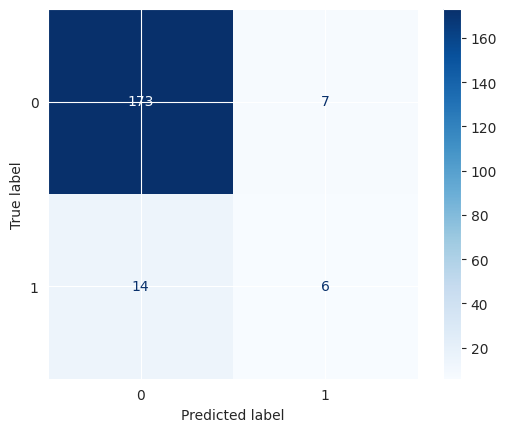

In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression(C=1.0, random_state=42).fit(X_train, y_train)
_=ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='.0f')

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
- utilize ```mean_samples_leaf=20```
- utilize ```max_depth=4```
- coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [82]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Simulação: Substitua estas variáveis pelos seus dados reais
# Supondo que temos "X" (dados de entrada) e "y" (rótulos reais)
# Substitua X, y com seus dados reais

#X = np.array([[1, 2], [3, 4], [5, 6]])  # Exemplo de dados de entrada
#y = np.array([0, 1, 0])  # Rótulos reais

# Vamos simular que você já treinou um modelo, e ele foi usado para prever rótulos
# Aqui vamos usar um exemplo simulado de predições (y_pred)
# CERTIFIQUE-SE de substituir isso por predições reais de seu modelo!
y_pred = [0, 1, 0]  # Coloque as predições do modelo aqui

# Passo 1: Calcular a matriz de confusão
cm = confusion_matrix(y, y_pred)
most_error_class = np.argmax(np.sum(cm, axis=1) - np.diag(cm)) # classe com maior erro

#Criar variavel binaria para classe de maior erro
y_binary = (y == most_error_class).astype(int)

print("Matriz de Confusão:")
print(cm)


Matriz de Confusão:
[[2 0]
 [0 1]]


In [78]:
# Passo 2: Criar e treinar árvore inicial
tree = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
tree.fit(X, y_binary)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [79]:
# Passo 3: Avaliar importâncias das variáveis
importances = tree.feature_importances_
important_features = np.argsort(importances)[-3:]  # Índices das 3 maiores importâncias

In [92]:
# Passo 4: Treinar nova arvore com as 3 variaveis selecionadas
X_new = X[:, important_features] #Selecionar as 3 variaveis mais importantes
tree_new = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
tree_new.fit(X_new, y_binary)

# Avaliar performance do novo modelo
y_new_pred = tree_new.predict(X_new)
accuracy = accuracy_score(y_binary, y_new_pred)
print("Acurácia do novo modelo:", accuracy)


Acurácia do novo modelo: 0.6666666666666666


<class 'pandas.core.frame.DataFrame'>


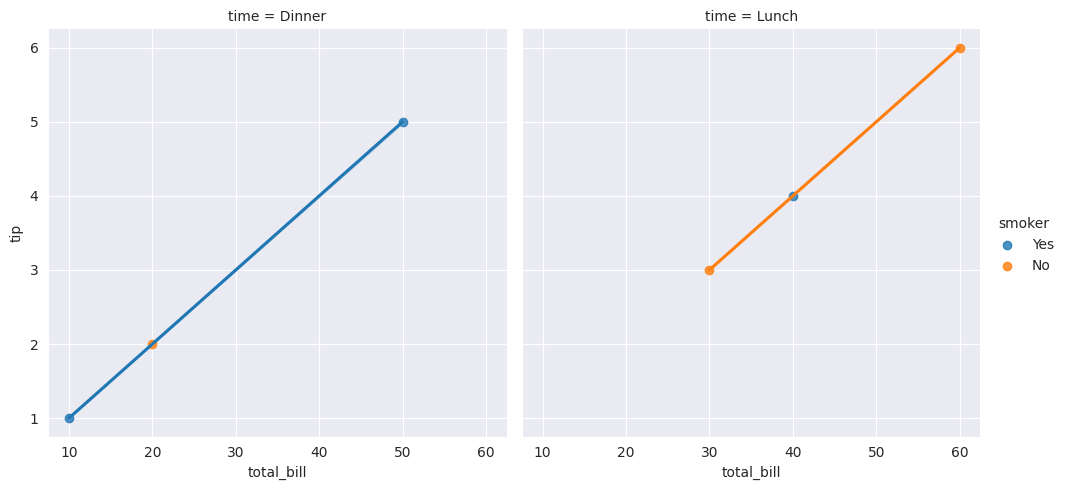

In [102]:
# Create or load a valid DataFrame
# Example DataFrame (replace this DataFrame creation with actual data loading if applicable)
accuracy = pd.DataFrame({
    "total_bill": [10, 20, 30, 40, 50, 60],
    "tip": [1, 2, 3, 4, 5, 6],
    "time": ["Dinner", "Dinner", "Lunch", "Lunch", "Dinner", "Lunch"],
    "smoker": ["Yes", "No", "No", "Yes", "Yes", "No"]
})

# Ensure it's a DataFrame
print(type(accuracy))  # Should print "<class 'pandas.core.frame.DataFrame'>"

# Plot using sns.lmplot
sns.lmplot(data=accuracy, x="total_bill", y="tip", col="time", hue="smoker")